<a href="https://colab.research.google.com/github/bagusetyaji/try.github.io/blob/master/Prediksi_Saham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote
df = web.DataReader('ACES', data_source='yahoo', start='2018-01-01', end='2021-12-12')
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-06-29,25.270000,25.080000,25.260000,25.209999,298200.0,24.452044
2018-07-02,25.309999,25.200001,25.309999,25.209999,3200.0,24.452044
2018-07-03,25.350000,25.304001,25.350000,25.304001,6800.0,24.543222
2018-07-05,25.497999,25.200001,25.200001,25.497999,2300.0,24.731384
2018-07-06,25.690001,25.690001,25.690001,25.690001,100.0,24.917614
...,...,...,...,...,...,...
2021-05-14,64.300003,62.910000,63.049999,64.230003,44700.0,64.230003
2021-05-17,63.779999,62.490002,63.529999,63.630001,44900.0,63.630001
2021-05-18,65.598999,63.535999,63.650002,64.830002,93000.0,64.830002


In [ ]:
#Get the number of rows and columns in the data set
df.shape

(728, 6)

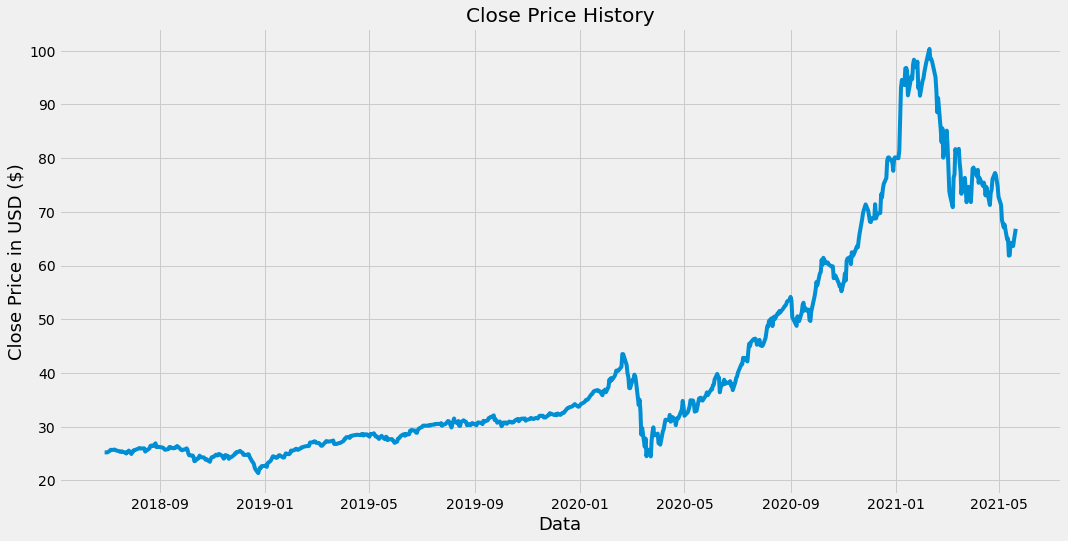

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price in USD ($)', fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close' column
data=df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)

training_data_len

583

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04875885],
       [0.04875885],
       [0.04994935],
       [0.05240626],
       [0.05483789],
       [0.05458459],
       [0.05547111],
       [0.05520516],
       [0.05379938],
       [0.0529382 ],
       [0.05154508],
       [0.05002532],
       [0.05065856],
       [0.05141843],
       [0.04977204],
       [0.04875885],
       [0.04609928],
       [0.04926544],
       [0.04926544],
       [0.05312816],
       [0.04507346],
       [0.05087386],
       [0.05087386],
       [0.05422999],
       [0.0543313 ],
       [0.05667425],
       [0.0576241 ],
       [0.05889057],
       [0.05890323],
       [0.0578774 ],
       [0.05838398],
       [0.05838398],
       [0.05078521],
       [0.05445794],
       [0.05369807],
       [0.05823201],
       [0.06382978],
       [0.06496959],
       [0.06420972],
       [0.06363981],
       [0.0701621 ],
       [0.06129686],
       [0.0629306 ],
       [0.06142349],
       [0.06180343],
       [0.06028369],
       [0.05939715],
       [0.057

In [ ]:
#Create the training dataset
#Create the scaled training dataset 
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60 : i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.04875885, 0.04875885, 0.04994935, 0.05240626, 0.05483789,
       0.05458459, 0.05547111, 0.05520516, 0.05379938, 0.0529382 ,
       0.05154508, 0.05002532, 0.05065856, 0.05141843, 0.04977204,
       0.04875885, 0.04609928, 0.04926544, 0.04926544, 0.05312816,
       0.04507346, 0.05087386, 0.05087386, 0.05422999, 0.0543313 ,
       0.05667425, 0.0576241 , 0.05889057, 0.05890323, 0.0578774 ,
       0.05838398, 0.05838398, 0.05078521, 0.05445794, 0.05369807,
       0.05823201, 0.06382978, 0.06496959, 0.06420972, 0.06363981,
       0.0701621 , 0.06129686, 0.0629306 , 0.06142349, 0.06180343,
       0.06028369, 0.05939715, 0.05711753, 0.0549012 , 0.05614233,
       0.05661093, 0.06128418, 0.06167679, 0.05977709, 0.05838398,
       0.05996706, 0.05939715, 0.06186677, 0.06382978, 0.05859928])]
[0.05585106254489974]

[array([0.04875885, 0.04875885, 0.04994935, 0.05240626, 0.05483789,
       0.05458459, 0.05547111, 0.05520516, 0.05379938, 0.0529382 ,
       0.05154508, 0.05002532, 0.05

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(523, 60, 1)

In [ ]:
#Build the LSTM mode
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

523/523 [==============================] - 12s 19ms/step - loss: 0.0031


In [ ]:
#Create the testing dataset
#Create a new array containing scaled values from index 523 to 728
test_data=scaled_data[training_data_len - 60: 728]
#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range (60, len(test_data)) :
  x_test.append(test_data[i-60: i, 0])


In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4.684270161595838

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


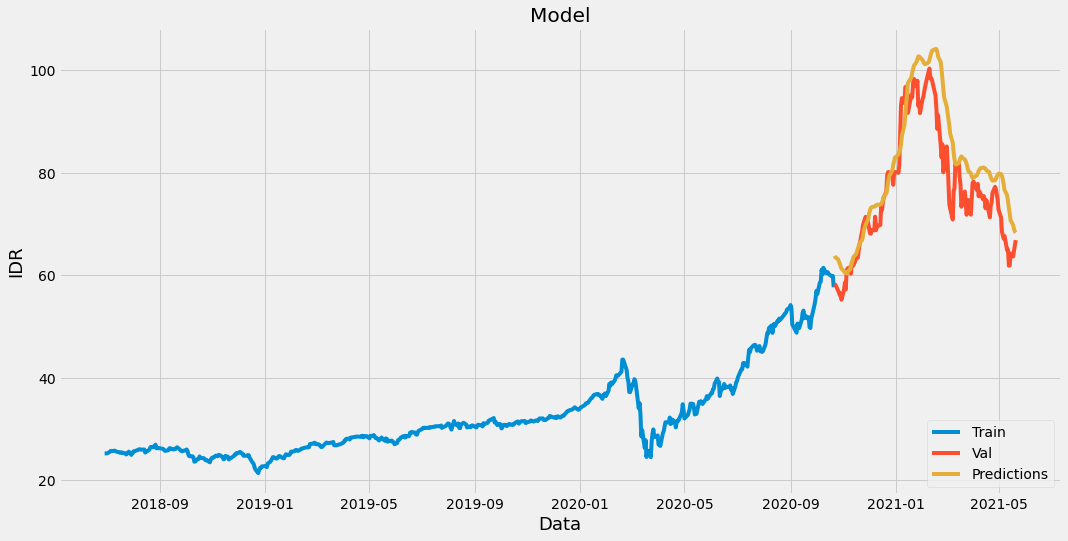

In [ ]:
#Plot
train = data[: training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('IDR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-10-22,58.110001,63.750053
2020-10-23,58.139999,63.448914
2020-10-26,57.040001,63.119717
2020-10-27,56.639000,62.705757
2020-10-28,56.080002,62.241089
...,...,...
2021-05-14,64.230003,70.733551
2021-05-17,63.630001,69.759979
2021-05-18,64.830002,68.986443
